In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline

In [ ]:
def bounds(value, x_values, order=1):
    lower = [x for x in x_values if x =< value]
    higher = [x for x in x_values if x >= value]

    if(order == 1):
        return max(lower), min(higher)
    else:
        lower_bounds = []
        upper_bounds = []

        for i in range(order):
            lower_bounds.append(max(lower))
            lower.remove(max(lower))

            upper_bounds.append(min(higher))
            higher.remove(max(higher))
        
        return lower_bounds, upper_bounds

def linear_interpolation(space, x_values, y_values):
    result = np.zeros(len(space))
    xy_dict = dict(zip(x_values, y_values))

    # interpolate the value 
    for index, value in enumerate(space):
        # check if our x-position is present in the x_values -> assign the defined value
        if(value in xy_dict):
            result[index] = xy_dict[value]
        else:
            lower_bound, upper_bound = bounds(value, x_values)
            t = value - lower_bound
            result[index] = (1 - t) * xy_dict[lower_bound] + t * xy_dict[upper_bound]

    return result

def bilinear_interpolation(point, x_values, y_values, z_values):
    """
    Bilinear Interpolation for a n x n grid

    Parameters:
        x_values:  
    """
    return 

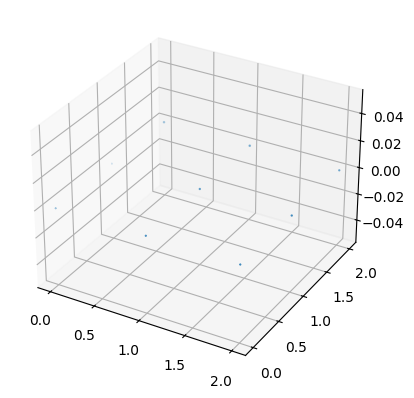

In [34]:
""" defining some data for us to use """
size = 3
x = np.linspace(0, size - 1, size)
y = np.linspace(0, size - 1, size)
z = np.random.rand(size, size)

X, Y = np.meshgrid(x, y)
Z = z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X, Y, Z)

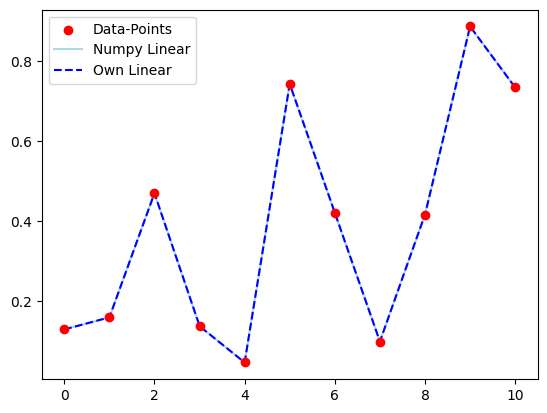

In [ ]:
""" define some data for us to use """
x_data = np.linspace(0, 10, 11)
y_data = np.random.rand(11)
x_space = np.linspace(0, 10, 1000)


""" linear interpolation """
numpy_linear_interpolation = np.interp(x_space, x_data, y_data)
own_linear_interpolation = linear_interpolation(x_space, x_data, y_data)

""" plot the data """
plt.scatter(x_data, y_data, zorder=10, label='Data-Points', color='red')
plt.plot(x_space, numpy_linear_interpolation, zorder=8, label='Numpy Linear', color='lightblue')
plt.plot(x_space, own_linear_interpolation, zorder=9, label='Own Linear', color='blue', linestyle='dashed')

plt.legend()